|  |  |
|----------|----------|
| Name: | Elad Siman Tov |
|  Course:   | ME 036049   |
|  Homerwork:   | No. 3   |


# Theory 

### Problem 3.1
If the activation function would be linear, the mapping would be ..
If the activation function was removed, the mapping would be ..


### Problem 3.5


### Problem 3.10


### Problem 4.4


### Problem 4.5


### Problem 4.6


# Computation

In [71]:
import numpy as np
import matplotlib.pyplot as plt 
from sympy import *

In [72]:
def init_weights(n_inputs, n_hidden, n_output):
    W0, W1, W2 = np.random.randn(n_inputs, n_hidden), np.random.randn(n_hidden, n_hidden), np.random.randn(n_hidden, n_output), 
    return W0, W1, W2


def feedforward(x, W0, W1, W2, a):
    z0 = x @ W0 # dimentions of 1000 x n_hidden
    a0 = a(z0)
    z1 = a0 @ W1 # dimentions of 1000 x n_hidden
    a1 = a(z1)
    z2 = a1 @ W2 # dimentions of 1000 x n_output
    a2 = a(z2)
    return [[z0, z1, z2], [a0, a1, a2]]


def predict(x, W0, W1, W2):
    activation_function = lambda p: 1 / (1 + np.exp(-p))
    forward = feedforward(x, W0=W0, W1=W1, W2=W2, a=activation_function)
    return forward[-1][-1]



In [76]:
# Test the implementation
n_inputs = 10
n_hidden = 5
n_output = 3
n_samples = 1000 # added this parameter to make the data more explanatory, we have 1000 samples, 10 inputs and 3 outputs.

X_train = np.random.randn(n_samples, n_inputs) 
Y_train = np.random.randn(n_samples, n_output)

# Normalize inputs and outputs to a 0-1 scale
sigmoid = lambda s: 1 / (1 + np.exp(-s))
X_train = sigmoid(X_train)
Y_train = sigmoid(Y_train)


W0, W1, W2 = init_weights(n_inputs, n_hidden, n_output)
Y_predicted = predict(X_train, W0, W1, W2) 
loss = np.sqrt(np.square(Y_predicted - Y_train))


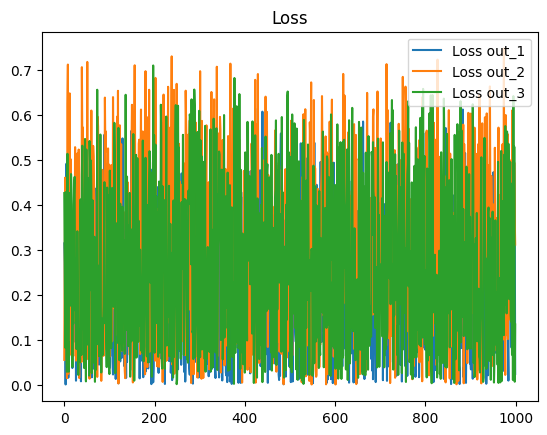

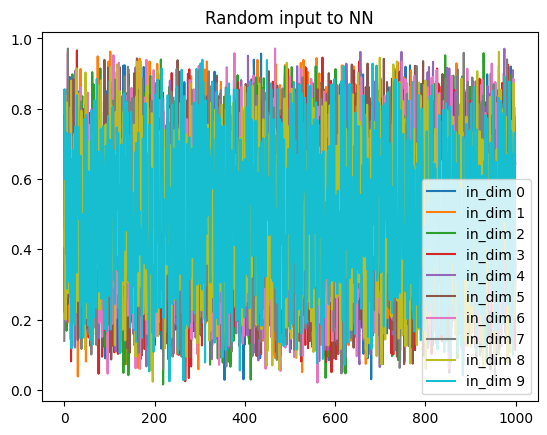

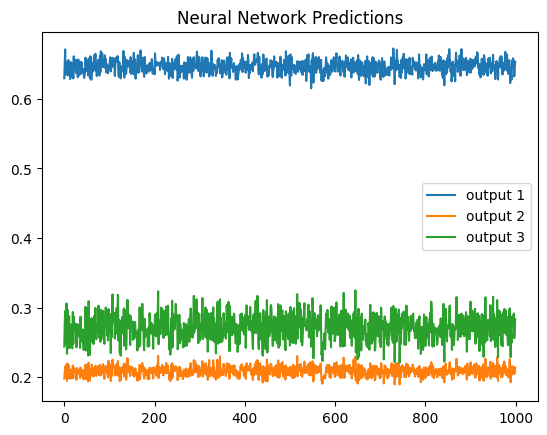

In [77]:
# Plot inputs, loss and outputs

plt.plot(loss, label=["Loss out_1", "Loss out_2", "Loss out_3",])
plt.legend()
plt.title('Loss')
plt.show()

plt.plot(X_train, label=[f'in_dim {_}' for _ in range(X_train.shape[1])])
plt.title('Random input to NN')
plt.legend()
plt.show()

plt.plot(Y_predicted, label=['output 1', 'output 2', 'output 3'])
plt.title('Neural Network Predictions')
plt.legend()
plt.show()



In [78]:
def forward_propogation(W, A, f):
    W = np.hstack([W, np.zeros([W.shape[0], 1])]) # update W to have zeros for the biases in last col
    A = np.hstack([A, np.zeros([A.shape[0], 1])]) # update A to have ones to multiply the biases
    Z = W @ A
    A_out = f(Z)
    return A_out

# Define some inputs
W = np.array([[1,2],[3,4]])
A = np.array([[1,2],[3,4],[1,1]])
f = lambda x: x**2

# Call the forward propogation function
A_out = forward_propogation(W, A, f)

# Display nicely the output matrix before activation function (SymPy)
print("Output before activation function:")
Matrix(np.sqrt(A_out))




Output before activation function:


Matrix([
[ 7.0, 10.0, 0],
[15.0, 22.0, 0]])

In [26]:
# Display nicely the output matrix after activation function (SymPy)
print("Output after activation function:")
Matrix(A_out)


Output after activation function:


Matrix([
[ 49.0, 100.0, 0],
[225.0, 484.0, 0]])